In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('troop_movements.csv')

In [4]:
print(df.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2023-10-10 10:25:42        1              x-wing           resistance   
1  2023-10-10 10:25:41        2  resistance_soldier           resistance   
2  2023-10-10 10:25:40        3  resistance_soldier               empire   
3  2023-10-10 10:25:39        4             unknown               empire   
4  2023-10-10 10:25:38        5               at-st           resistance   

   location_x  location_y  destination_x  destination_y     homeworld  
0           2          10              4              7         Shili  
1           3           1              8              4  Concord Dawn  
2           3           3              8              3        Ryloth  
3           3           9              3              9         Cerea  
4           7           1              8              5         Naboo  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             1000 non-null   object
 1   unit_id               1000 non-null   int64 
 2   unit_type             1000 non-null   object
 3   empire_or_resistance  1000 non-null   object
 4   location_x            1000 non-null   int64 
 5   location_y            1000 non-null   int64 
 6   destination_x         1000 non-null   int64 
 7   destination_y         1000 non-null   int64 
 8   homeworld             1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [74]:
grouped = df.groupby('empire_or_resistance')
comparison_df = grouped.size().reset_index(name='count')
comparison_df.rename(columns={'empire_vs_resistance': 'Group', 'count': 'Count'}, inplace=True), comparison_df

(None,
   empire_or_resistance  Count
 0               empire    498
 1           resistance    502)

In [70]:
print(comparison_df)

                Group  Count
0               at-at    132
1               at-st    113
2  resistance_soldier    121
3        stormtrooper    149
4         tie_fighter    126
5        tie_silencer    121
6             unknown    121
7              x-wing    117


In [75]:
grouped2 = df.groupby('homeworld')
comparison2_df = grouped2.size().reset_index(name='count')
comparison2_df.rename(columns={'homeworld': 'Group', 'count': 'Count'}, inplace=True)
print(comparison2_df)

           Group  Count
0       Alderaan     15
1    Aleen Minor     22
2     Bestine IV     15
3          Cerea     32
4       Champala     27
5      Chandrila     15
6   Concord Dawn     28
7       Corellia     26
8        Dagobah     27
9       Dathomir     27
10         Dorin     26
11        Eriadu     16
12   Glee Anselm     16
13    Haruun Kal     20
14       Iktotch     23
15      Iridonia     22
16         Kalee     18
17      Kashyyyk     20
18     Malastare     21
19        Mirial     36
20      Mon Cala     23
21    Muunilinst     24
22         Naboo     30
23          Ojom     36
24       Quermia     21
25         Rodia     20
26        Ryloth     22
27       Serenno     23
28         Shili     27
29         Skako     27
30       Socorro     25
31       Stewjon     26
32       Sullust     21
33      Tatooine     23
34       Tholoth     29
35      Toydaria     26
36     Trandosha     27
37       Troiken     28
38          Tund     30
39        Umbara     21
40       Vulpter

In [76]:
grouped3 = df.groupby('unit_type')
comparison_df3 = grouped3.size().reset_index(name='count')
comparison_df3.rename(columns={'unit_type': 'Group', 'count': 'Count'}, inplace=True), comparison_df

(None,
   empire_or_resistance  Count
 0               empire    498
 1           resistance    502)

In [51]:
def is_resistance(row):
    return row['empire_or_resistance'] == 'resistance'

In [52]:
df['is_resistance']= df.apply(is_resistance, axis=1)

In [53]:
print(df)

               timestamp  unit_id           unit_type empire_or_resistance  \
0    2023-10-10 10:25:42        1              x-wing           resistance   
1    2023-10-10 10:25:41        2  resistance_soldier           resistance   
2    2023-10-10 10:25:40        3  resistance_soldier               empire   
3    2023-10-10 10:25:39        4             unknown               empire   
4    2023-10-10 10:25:38        5               at-st           resistance   
..                   ...      ...                 ...                  ...   
995  2023-10-10 10:09:07      996        tie_silencer               empire   
996  2023-10-10 10:09:06      997              x-wing               empire   
997  2023-10-10 10:09:05      998  resistance_soldier           resistance   
998  2023-10-10 10:09:04      999         tie_fighter               empire   
999  2023-10-10 10:09:03     1000               at-st               empire   

     location_x  location_y  destination_x  destination_y     h

<Axes: xlabel='empire_or_resistance', ylabel='Count'>

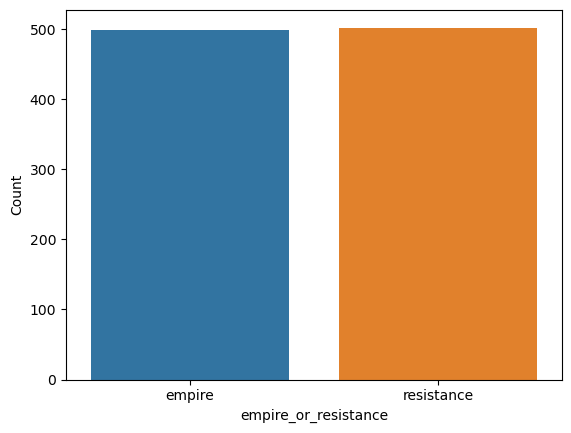

In [77]:
sns.barplot(data=comparison_df, x='empire_or_resistance', y='Count')

In [71]:
print(comparison3_df)

            unit_type  Count
0               at-at    132
1               at-st    113
2  resistance_soldier    121
3        stormtrooper    149
4         tie_fighter    126
5        tie_silencer    121
6             unknown    121
7              x-wing    117


In [92]:
x = df[['homeworld','unit_type']]
y = df[['empire_or_resistance']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

encoder= OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_encoded, y_train)

y_pred = dt_classifier.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

NameError: name 'accuracy_score' is not defined